<a href="https://colab.research.google.com/github/SeeBook2022/SeeBook-OCR/blob/main/data/pre-processing/image_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 데이터 확인 및 테스트

In [ ]:
from PIL import Image
import os
from matplotlib.pyplot import imshow
import numpy as np

In [ ]:
# 이미지 열기
img1 = Image.open('/content/drive/MyDrive/aiffel_hackathon3/crop_data/1.jpg')
img2 = Image.open('/content/drive/MyDrive/aiffel_hackathon3/crop_data/2.jpg')

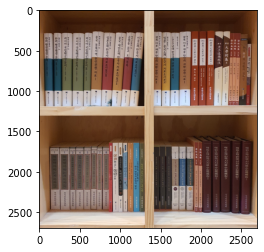

In [ ]:
imshow(np.asarray(img1))

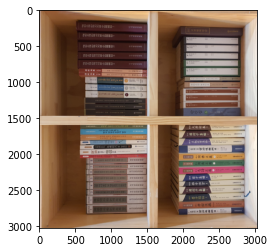

In [ ]:
imshow(np.asarray(img2)) # 이미지 회전 문제 확인

In [ ]:
img.size
img.save('/content/drive/MyDrive/aiffel_hackathon3/crop_result/test_2.png', 'png')

In [ ]:
img = img.resize((1000,1000))
img.save('/content/drive/MyDrive/aiffel_hackathon3/crop_result/test_1.png', 'png')

In [ ]:
w, h = img.size
print(w)
print(h)

1000
1000


In [ ]:
w2 = w/2
h2 = h/2

In [ ]:
crop_img = img.crop((0, 0, w2, h2))

In [ ]:
crop_img.save('/content/drive/MyDrive/aiffel_hackathon3/crop_result/test.png', 'png')

In [ ]:
crop_img2 = img.crop((w2, 0, w, h2))

In [ ]:
crop_img2.save('/content/drive/MyDrive/aiffel_hackathon3/crop_result/test2.png', 'png')

In [ ]:
crop_img = img.crop((0, 0, w2, h2))
crop_img2 = img.crop((w2, 0, w, h2))
crop_img3 = img.crop((0, h2, w2, h))
crop_img4 = img.crop((w2, h2, w, h))

## 이미지 4등분 크롭, 회전, 저장, 파일 이름 변경(리사이즈 O)

In [ ]:
# import
from PIL import Image
import os

# 경로 및 변수 지정
dir_path = '/content/drive/MyDrive/aiffel_hackathon3/Test_sample/'
file_list = os.listdir(dir_path)
save_path = '/content/drive/MyDrive/aiffel_hackathon3/crop_result/'
resize_w, resize_h = 1280, 1280


# 이미지 파일 불러오기 & resize
def resize_image(dir_path, file_list, resize_w, resize_h):
    resize_img = []
    for file in file_list:
        img = Image.open(dir_path +'/'+ file)
        img = img.resize((resize_w, resize_h))
        resize_img.append(img)
    return resize_img    

# 사진 크롭하기
def crop_image(resize_img):
    image = resize_img[0]
    w, h = image.size
    w2 = w/2
    h2 = h/2    

    crop_list = []
    for img in resize_img:
        crop_img = img.crop((0, 0, w2, h2))
        crop_img2 = img.crop((w2, 0, w, h2))
        crop_img3 = img.crop((0, h2, w2, h))
        crop_img4 = img.crop((w2, h2, w, h))

        crop_list.append(crop_img)
        crop_list.append(crop_img2)
        crop_list.append(crop_img3)
        crop_list.append(crop_img4)

    return crop_list

# 사진 저장
def save_image(save_path, img_list):
    for idx, img in enumerate(img_list):
        img.save(save_path + str(idx), 'png')

# 사진 회전
def rotation(dir_path, file_list, save_path):
    for idx, file in enumerate(file_list):
        img = Image.open(dir_path +'/'+ file)
        img = img.rotate(270)
        img.save(save_path + 'rotation' + str(idx), 'png')
 
        
# 파일명 변경
def change_name(file_path, file_list):
    for idx, filename in enumerate(file_list):
        os.rename(file_path + filename, file_path + 'image' + str(idx+555) +'.png')

In [ ]:
resize_list = resize_image(dir_path, file_list, resize_w, resize_h)
crop_list = crop_image(resize_list)
save_image(save_path, crop_list)

In [ ]:
rotation_dir_path = '/content/drive/MyDrive/aiffel_hackathon3/crop_result'
rotation_file_list = os.listdir(rotation_dir_path)
save_path = '/content/drive/MyDrive/aiffel_hackathon3/4crop(3)/'

In [ ]:
rotation(rotation_dir_path, rotation_file_list, save_path)

In [ ]:
cname_file_path = '/content/drive/MyDrive/aiffel_hackathon3/crop_result/'
rename_file_list = os.listdir(cname_file_path)

In [ ]:
change_name(cname_file_path, rename_file_list)

## 이미지 4등분 크롭, 회전, 저장, 파일 이름 변경(리사이즈 X)

In [ ]:
# 리사이즈 X

# import
from PIL import Image
import os

# 이미지 파일 불러오기 
def crop_image(dir_path, file_list):

    # 사진 크롭하기
    crop_list = []
    for file in file_list:
        img = Image.open(dir_path + file)
        w, h = img.size
        w2 = w/2
        h2 = h/2    

        crop_img = img.crop((0, 0, w2, h2))
        crop_img2 = img.crop((w2, 0, w, h2))
        crop_img3 = img.crop((0, h2, w2, h))
        crop_img4 = img.crop((w2, h2, w, h))

        crop_list.append(crop_img)
        crop_list.append(crop_img2)
        crop_list.append(crop_img3)
        crop_list.append(crop_img4)

    return crop_list

# 사진 저장하기
def save_image(save_path, img_list):
    for idx, img in enumerate(img_list):
        img.save(save_path + str(idx), "JPEG")

# 사진 회전
def rotation(dir_path, file_list, save_path):
    for idx, file in enumerate(file_list):
        img = Image.open(dir_path + file)
        img = img.rotate(270)
        img.save(save_path + 'rotation' + str(idx), "JPEG")


def change_name(file_path, file_list):
    for idx, filename in enumerate(file_list):
        os.rename(file_path + filename, file_path + 'image' + str(idx+1855))

In [ ]:
# 경로 및 변수 지정
dir_path = '/content/drive/MyDrive/aiffel_hackathon3/crop_result2/rotation/'
file_list = os.listdir(dir_path)
save_path = '/content/drive/MyDrive/aiffel_hackathon3/crop_result2/'

In [ ]:
save_image(save_path, crop_image(dir_path, file_list))

In [ ]:
rotation(dir_path, file_list, save_path)

In [ ]:
file_path = '/content/drive/MyDrive/aiffel_hackathon3/crop_result3/'
file_list = os.listdir(file_path)

In [ ]:
change_name(file_path, file_list)

## 참고 자료



[[PIL] Pillow Image를 특정 폴더에 저장하는 방법
](https://lapina.tistory.com/122)  

[[Python] PIL 사용해서 이미지 잘라내기/크롭](https://sssunho.tistory.com/2)  

[파이썬 이미지 처리 (Pillow)](http://pythonstudy.xyz/python/article/406-%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EC%B2%98%EB%A6%AC-Pillow)